##**Prediction of English Language Proficiency Assessments for California (ELPAC) Scores Using Machine Learning Approach**
###**MACHINE LEARNING MODELINGS**

###**TEAM MEMBERS: TEAM 3: EMMA OO, LUKE AWINO, OSCAR GIL**
###**Applied Data Science Master’s Program, Shiley Marcos School of Engineering / University of San Diego**
###**DATE: 11/12/2022**

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import datetime
import warnings 
warnings.filterwarnings(action= 'ignore')

#modeling packages
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn import tree
import warnings 
warnings.filterwarnings(action= 'ignore')

In [2]:
# Import file
df = pd.read_csv('https://raw.githubusercontent.com/OscarG-DataSci/ADS-599B/main/Data%20Folder/new_elpac.csv')
df.head() #check the head

,School_deID,GradeLevel,StudentGender,StudentEthnicity,Special_Education,Homeless,SocioEconomically,TestDayName,OverallScore,OverallLevel,ExpectedAttendanceDays,DaysAttended,EnrolledPct,GradeAttendedPct,TeacherGender,TeacherTotalYearsOfService,TeacherEthnicity,OverallScoreStd,TotalAssessments,TestInstance,Growth
0,3,1,0,4,0,1,1,6,1503,4,180.0,175.0,1.0,1.972222,0,4,3,0.740042,3,1,0
1,3,2,0,4,0,1,1,5,1549,4,180.0,175.0,1.0,2.972222,0,22,3,0.725455,3,2,0
2,3,3,0,4,0,1,1,5,1466,2,180.0,177.0,1.0,3.983333,0,25,3,0.605364,3,3,-2
3,5,4,1,4,0,0,1,0,1535,3,180.0,168.0,1.0,4.933333,0,2,5,0.662651,1,1,0
4,6,3,1,4,0,0,1,6,1412,1,180.0,179.0,1.0,3.994444,0,2,3,0.501916,3,1,0


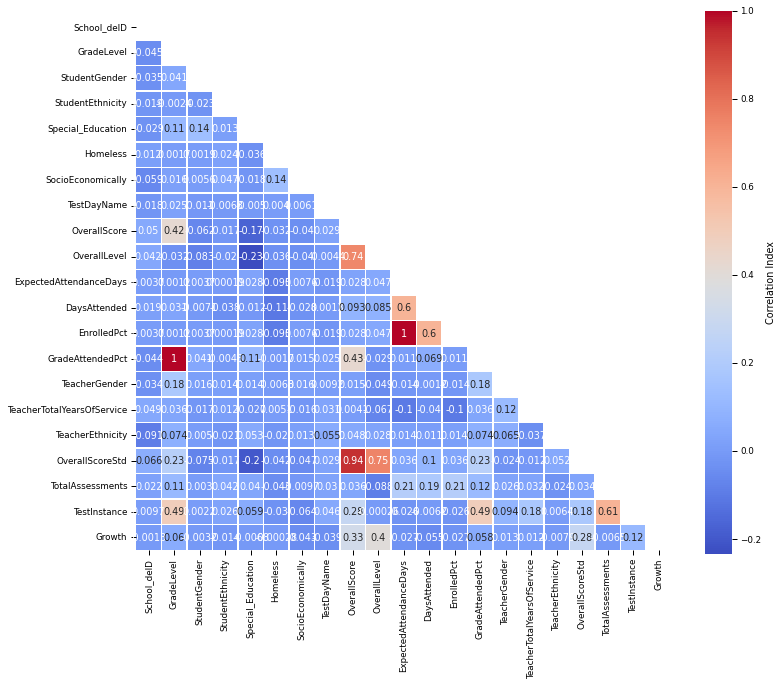

In [3]:
#check for correlations
corr = df.corr()
sns.set_context('paper', font_scale=1)
plt.figure(figsize=(12,10))
plt.tight_layout(pad = 10, w_pad=10, h_pad=10)
matrix = np.triu(corr)
sns.heatmap(df.corr(method='pearson'), annot=True,
linewidths=.5, cmap="coolwarm", mask=matrix,
square = True, cbar_kws={'label':
'Correlation Index'})
plt.show()

In [4]:
#drop highly correlated variable OverallScoreStd
df = df.drop(columns=['OverallScoreStd'])

In [5]:
X = df.loc[ : , df.columns != 'OverallLevel']
y = df[['OverallLevel']]
#split 70% train 30% test
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=700, test_size=0.30)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(6622, 19) (6622, 1) (2838, 19) (2838, 1)


###**STANDARDIZING THE DATASET**
**Train and test dataset were also standardized to test for better performance on trained models.**

In [6]:
#for test purpose create a scaled X and compare the results
X_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled= StandardScaler().fit_transform(X_test)

###**LOGISTIC REGRESSION MODEL (UNSCALED DATA)**

In [7]:
#logistic regression model
logreg = LogisticRegression(random_state=599)
logreg.fit(X_train,y_train)
lg_pred = logreg.predict(X_test)
# print accuracy
logX = logreg.predict(X_train)
print('Train Accuracy:', str(round(accuracy_score(y_train, logX)*100,2)) + '%')
print('Test Accuracy:', str(round(accuracy_score(y_test, lg_pred)*100,2)) +'%')
print('Classification Stats:')
print(classification_report(y_test,lg_pred))


Train Accuracy: 57.17%
Test Accuracy: 58.1%
Classification Stats:
              precision    recall  f1-score   support

           1       0.69      0.63      0.66       517
           2       0.56      0.45      0.50       830
           3       0.55      0.81      0.65      1026
           4       0.66      0.27      0.38       465

    accuracy                           0.58      2838
   macro avg       0.61      0.54      0.55      2838
weighted avg       0.60      0.58      0.56      2838



###**LOGISTIC REGRESSION MODEL (STANDARDIZED)**

In [8]:
#scaled logistic regression

logreg_Scale = LogisticRegression(random_state=599)
logreg_Scale.fit(X_scaled,y_train)
#evaluate on train data
trainX = logreg_Scale.predict(X_scaled)
print('Train Accuracy:', str(round(accuracy_score(y_train, trainX)*100,2)) + '%')
lg_pred_scaled = logreg_Scale.predict(X_test_scaled)
#check the accuracy
print('Test Accuracy:', str(round(accuracy_score(y_test, lg_pred_scaled)*100,2))+'%')
print('Test Classification Stats:')
print(classification_report(y_test,lg_pred_scaled))


Train Accuracy: 85.05%
Test Accuracy: 84.57%
Test Classification Stats:
              precision    recall  f1-score   support

           1       0.92      0.89      0.90       517
           2       0.83      0.85      0.84       830
           3       0.82      0.85      0.84      1026
           4       0.86      0.78      0.82       465

    accuracy                           0.85      2838
   macro avg       0.86      0.84      0.85      2838
weighted avg       0.85      0.85      0.85      2838



Since accuracy for LG model with scaled dataset is better, we will do hyperparameter tuning on the scaled dataset.

###**PENALIZED LOGISTIC REGRESSION MODEL (STANDARDIZED)**

In [9]:
#Penalized logistic regression

logpen = LogisticRegression(penalty ='l2',
solver = 'newton-cg', random_state=599) 
logpenn=logpen.fit(X_scaled,y_train)
#evaluate on train data
trainX1 = logpen.predict(X_scaled)
print('Train Accuracy:', str(round(accuracy_score(y_train, trainX1)*100,2))+'%')
lg_pred_pen = logpen.predict(X_test_scaled)
#check the accuracy
print('Test Accuracy:', str(round(accuracy_score(y_test, lg_pred_pen)*100,2))+'%')
print('Test Classification Stats:')
print(classification_report(y_test,lg_pred_pen))


Train Accuracy: 85.03%
Test Accuracy: 84.57%
Test Classification Stats:
              precision    recall  f1-score   support

           1       0.92      0.89      0.90       517
           2       0.83      0.85      0.84       830
           3       0.82      0.85      0.84      1026
           4       0.86      0.78      0.82       465

    accuracy                           0.85      2838
   macro avg       0.86      0.84      0.85      2838
weighted avg       0.85      0.85      0.85      2838



###**TUNED LOGISTIC REGRESSION MODEL**

In [10]:
# setting the parameter grid
param_grid = {'solver': ['newton-cg', 'saga'], 
                   'penalty': ['l1', 'l2', 'elasticnet'],
                  'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# perform hyperparameter tuning
print("# Tuning hyper-parameters for accuracy\n")
tuned_log = GridSearchCV(LogisticRegression(random_state=599),param_grid, cv=5, scoring='accuracy') 
tuned_log.fit(X_scaled,y_train)
# view accuracy scores for all the models
print("Grid scores for all the Logistic Regression Model based on CV:\n")
means = tuned_log.cv_results_['mean_test_score']
stds = tuned_log.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, tuned_log.cv_results_['params']):
    print("%0.5f (+/-%0.05f) for %r" % (mean, std * 2, params))
# check out best model performance
print("\nBest parameters set found on training set:", tuned_log.best_params_)
print("Best model test accuracy:", tuned_log.best_score_)

log_best = tuned_log.best_estimator_
tuned_log_y_pred = log_best.predict(X_test_scaled)

print('\n\nTuned Model Stats:')
print('Test Classification Stats:')
print(classification_report(y_test,tuned_log_y_pred))

# Tuning hyper-parameters for accuracy

Grid scores for all the Logistic Regression Model based on CV:

nan (+/-nan) for {'C': 0.001, 'penalty': 'l1', 'solver': 'newton-cg'}
0.36922 (+/-0.00319) for {'C': 0.001, 'penalty': 'l1', 'solver': 'saga'}
0.56176 (+/-0.00846) for {'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg'}
0.56176 (+/-0.00846) for {'C': 0.001, 'penalty': 'l2', 'solver': 'saga'}
nan (+/-nan) for {'C': 0.001, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
nan (+/-nan) for {'C': 0.001, 'penalty': 'elasticnet', 'solver': 'saga'}
nan (+/-nan) for {'C': 0.01, 'penalty': 'l1', 'solver': 'newton-cg'}
0.79780 (+/-0.02408) for {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}
0.77998 (+/-0.01614) for {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.77998 (+/-0.01614) for {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
nan (+/-nan) for {'C': 0.01, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
nan (+/-nan) for {'C': 0.01, 'penalty': 'elasticnet', 'solver': 'saga'}
nan (+/-nan)

###**K-NEAREST NEIGHBORS (KNN)**

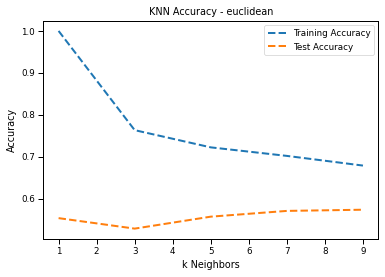

metric: euclidean


k values,Training Accuracy,Test Accuracy
1,1.000000,0.553206
3,0.763214,0.528189
5,0.722138,0.556730
7,0.701752,0.570472
9,0.678647,0.573291


In [11]:
metric='euclidean'
knn_accuracy = []

for i in range(1, 10, 2):
    knn_clsf = KNeighborsClassifier(metric=metric, n_neighbors=i).fit(X_scaled, y_train)

    knn_clsf_train_pred = knn_clsf.predict(X_scaled)
    knn_clsf_test_pred  = knn_clsf.predict(X_test_scaled)

    knn_accuracy.append({'k values': i,
                         'Training Accuracy': accuracy_score(knn_clsf_train_pred, y_train),
                         'Test Accuracy': accuracy_score(knn_clsf_test_pred, y_test)})

# Plot
print("\n")
plt.plot(pd.DataFrame(knn_accuracy)['k values'], pd.DataFrame(knn_accuracy)['Training Accuracy'], '--', linewidth=2, label='Training Accuracy')
plt.plot(pd.DataFrame(knn_accuracy)['k values'], pd.DataFrame(knn_accuracy)['Test Accuracy'], '--', linewidth=2, label='Test Accuracy')
plt.xlabel('k Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy - ' + metric)
plt.legend()
plt.show()

# Results
print("metric:", metric)
pd.DataFrame(knn_accuracy).style.hide_index()

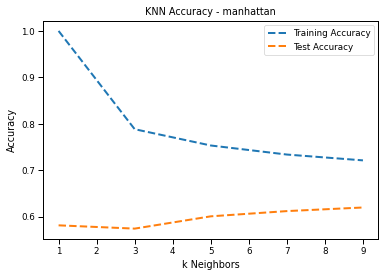

metric: manhattan


k values,Training Accuracy,Test Accuracy
1,1.000000,0.581748
3,0.788584,0.574700
5,0.753549,0.601128
7,0.734068,0.612403
9,0.721534,0.620155


In [12]:
metric='manhattan'
knn_accuracy = []

for i in range(1, 10, 2):
    knn_clsf = KNeighborsClassifier(metric=metric, n_neighbors=i).fit(X_scaled, y_train)

    knn_clsf_train_pred = knn_clsf.predict(X_scaled)
    knn_clsf_test_pred  = knn_clsf.predict(X_test_scaled)

    knn_accuracy.append({'k values': i,
                         'Training Accuracy': accuracy_score(knn_clsf_train_pred, y_train),
                         'Test Accuracy': accuracy_score(knn_clsf_test_pred, y_test)})

# Plot
print("\n")
plt.plot(pd.DataFrame(knn_accuracy)['k values'], pd.DataFrame(knn_accuracy)['Training Accuracy'], '--', linewidth=2, label='Training Accuracy')
plt.plot(pd.DataFrame(knn_accuracy)['k values'], pd.DataFrame(knn_accuracy)['Test Accuracy'], '--', linewidth=2, label='Test Accuracy')
plt.xlabel('k Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy - ' + metric)
plt.legend()
plt.show()

# Results
print("metric:", metric)
pd.DataFrame(knn_accuracy).style.hide_index()

With elbow method, k=5 is the optimal k.  Manhattan distance's accuracy at k=5 is 0.60 for the test dataset and outperform over Euclidean. Thus, we will train our model with Manhattan distance. 

In [13]:
knn_classifier = KNeighborsClassifier(metric='manhattan', n_neighbors=5)

knn_classifier.fit(X_scaled, y_train)

knn_test_pred = knn_classifier.predict(X_test_scaled)
knn_train_pred = knn_classifier.predict(X_scaled)

print('''Metric: Manhattan
Neighbors: 5''')
print('Train Accuracy:', str(round(accuracy_score(y_train, knn_train_pred)*100,2))+ '%')
print('Test Accuracy: ', str(round(accuracy_score(y_test, knn_test_pred)*100,2))+ '%')
print("\n")
print(classification_report(y_test,knn_test_pred))

Metric: Manhattan
Neighbors: 5
Train Accuracy: 75.35%
Test Accuracy:  60.11%


              precision    recall  f1-score   support

           1       0.68      0.60      0.63       517
           2       0.50      0.56      0.53       830
           3       0.60      0.68      0.64      1026
           4       0.80      0.50      0.62       465

    accuracy                           0.60      2838
   macro avg       0.65      0.58      0.60      2838
weighted avg       0.62      0.60      0.60      2838



###**DECISION TREE**

In [14]:
dtc_clf = DecisionTreeClassifier(criterion="gini",max_depth=5).fit(X,y)

dtc_test_pred = dtc_clf.predict(X_test)
dtc_train_pred = dtc_clf.predict(X_train)

print('Train Accuracy:', str(round(accuracy_score(y_train, dtc_train_pred)*100,2))+ '%')
print('Test Accuracy: ', str(round(accuracy_score(y_test, dtc_test_pred)*100,2))+ '%')
print("\n")
print(classification_report(y_test,dtc_test_pred))

Train Accuracy: 82.3%
Test Accuracy:  82.7%


              precision    recall  f1-score   support

           1       0.87      0.94      0.90       517
           2       0.88      0.65      0.74       830
           3       0.75      0.95      0.83      1026
           4       0.96      0.76      0.85       465

    accuracy                           0.83      2838
   macro avg       0.86      0.82      0.83      2838
weighted avg       0.84      0.83      0.82      2838



###**RANDOM FOREST**

In [15]:
#import warnings
#warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier

train_errors = list()
test_errors = list()

for i in range(1,50):
  rf_model = RandomForestClassifier(max_depth=i)    #Create multiple models here each based on the i variable above
  rf_model.fit(X_train,y_train)
  train_pred = rf_model.predict(X_train)
  test_pred = rf_model.predict(X_test)
  train_errors.append(accuracy_score(y_train,train_pred))    # Store the result of modes in t_train_erors and t_test_errors variables
  test_errors.append(accuracy_score(y_test, test_pred))

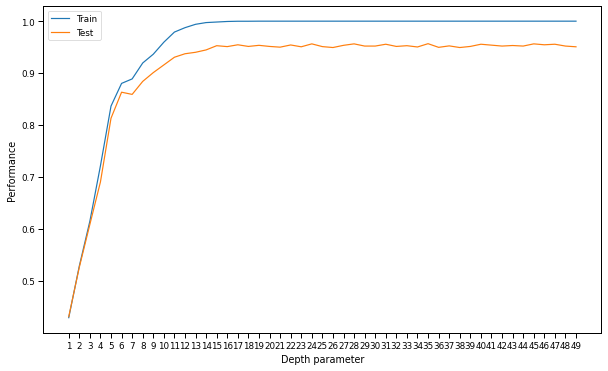

In [16]:
# Plot of test and training errors
fig,ax = plt.subplots(figsize=(10,6))
plt.plot(range(1,50),train_errors, label='Train')
plt.plot(range(1,50),test_errors, label='Test')
plt.legend(loc='upper left')
plt.xlabel('Depth parameter')
plt.ylabel('Performance')
plt.xticks(ticks =np.arange(1, 50, 1));

In [17]:
tuned_rf= RandomForestClassifier(max_depth=13, class_weight = 'balanced')
tuned_rf.fit(X_train,y_train)

rf_test_pred = tuned_rf.predict(X_test)
rf_train_pred = tuned_rf.predict(X_train)

print('Train Accuracy:', str(round(accuracy_score(y_train, rf_train_pred)*100,2))+ '%')
print('Test Accuracy: ', str(round(accuracy_score(y_test, rf_test_pred)*100,2))+ '%')
print("\n")
print(classification_report(y_test,rf_test_pred))

Train Accuracy: 99.65%
Test Accuracy:  95.0%


              precision    recall  f1-score   support

           1       0.98      0.96      0.97       517
           2       0.93      0.95      0.94       830
           3       0.94      0.95      0.95      1026
           4       0.97      0.93      0.95       465

    accuracy                           0.95      2838
   macro avg       0.96      0.95      0.95      2838
weighted avg       0.95      0.95      0.95      2838



###**GRADIENT BOOSTING CLASSIFIER**

In [18]:
#base gradient boosting model
gbc = GradientBoostingClassifier(random_state=599)
gbc.fit(X_train, y_train)
gbc.fit(X_train,y_train)
gbc_pred = gbc.predict(X_test)
# print accuracy
gbcX = gbc.predict(X_train)
print('Train Accuracy:', str(round(accuracy_score(y_train, gbcX)*100,2)) +'%')
print('Test Accuracy:', str(round(accuracy_score(y_test, gbc_pred)*100,2))+ '%')
print('Classification Stats:')
print(classification_report(y_test,gbc_pred))


Train Accuracy: 97.51%
Test Accuracy: 96.72%
Classification Stats:
              precision    recall  f1-score   support

           1       0.99      0.97      0.98       517
           2       0.96      0.98      0.97       830
           3       0.96      0.97      0.96      1026
           4       0.98      0.93      0.95       465

    accuracy                           0.97      2838
   macro avg       0.97      0.96      0.97      2838
weighted avg       0.97      0.97      0.97      2838



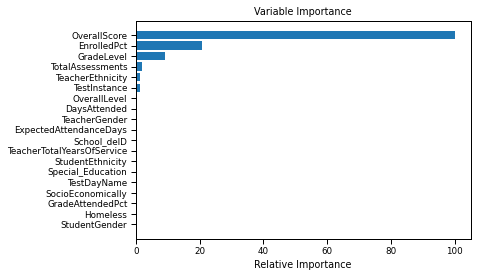

In [19]:
# gbc.feature_importances_
feature_importance = gbc.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())

sorted_idx = np.argsort(feature_importance)
pos        = np.arange(sorted_idx.shape[0]) + .5

plt.barh(pos, feature_importance[sorted_idx], align='center');
plt.yticks(pos, df.columns[sorted_idx]);
plt.xlabel('Relative Importance');
plt.title('Variable Importance');

###**GBC WITH ONLY THE TOP 6 IMPORTANT FEATURES**

In [20]:
small_train = X_train[['OverallScore','EnrolledPct','GradeLevel','TotalAssessments','TeacherEthnicity','TestInstance']].copy()
small_test = X_test[['OverallScore', 'EnrolledPct','GradeLevel','TotalAssessments','TeacherEthnicity','TestInstance']].copy()

In [21]:
#base gradient boosting model
s_gbc = GradientBoostingClassifier(random_state=599)
s_gbc.fit(small_train, y_train)
s_gbc.fit(small_train,y_train)
s_gbc_pred = s_gbc.predict(small_test)
# print accuracy
s_gbcX = s_gbc.predict(small_train)
print('Train Accuracy:', str(round(accuracy_score(y_train, s_gbcX)*100,2)) +'%')
print('Test Accuracy:', str(round(accuracy_score(y_test, s_gbc_pred)*100,2)) +'%')
print('Classification Stats:')
print(classification_report(y_test,s_gbc_pred))

Train Accuracy: 97.25%
Test Accuracy: 96.93%
Classification Stats:
              precision    recall  f1-score   support

           1       0.99      0.98      0.98       517
           2       0.97      0.97      0.97       830
           3       0.96      0.98      0.97      1026
           4       0.99      0.93      0.96       465

    accuracy                           0.97      2838
   macro avg       0.97      0.97      0.97      2838
weighted avg       0.97      0.97      0.97      2838



###**HISTOGRADIENT BOOSTING CLASSIFIER (HGB) WITH ALL VARIABLES**

In [22]:
hgb = HistGradientBoostingClassifier(random_state=599)
hgb.fit(X_train, y_train)
hgb_pred = hgb.predict(X_test)
# print accuracy
hgbX = hgb.predict(X_train)
print('Train Accuracy:', str(round(accuracy_score(y_train, hgbX)*100,2))+ '%')
print('Test Accuracy:', str(round(accuracy_score(y_test, hgb_pred)*100,2))+ '%')
print('Classification Stats:')
print(classification_report(y_test,hgb_pred))


Train Accuracy: 100.0%
Test Accuracy: 97.46%
Classification Stats:
              precision    recall  f1-score   support

           1       0.99      0.99      0.99       517
           2       0.97      0.98      0.98       830
           3       0.97      0.98      0.97      1026
           4       0.98      0.95      0.96       465

    accuracy                           0.97      2838
   macro avg       0.98      0.97      0.97      2838
weighted avg       0.97      0.97      0.97      2838



For the purpose of creating the web app, we want to simplify the app using only the partial variables including only most of student's information for better convenience.  
For example, if the model included 'TeachYearsofService', one will have to investigate more on teacher's information. Thus, we will only use the School ID and student's information to train HGB as 'HGB_Partial'.  If the accuracy is still optimal above 90%, then we will use 'HGB_Partial' for creating a streamlit webapp. 

In [23]:
Xs_train = X_train.drop(columns = ['TotalAssessments','TestInstance','Growth','TeacherGender','TeacherTotalYearsOfService'])
Xs_test = X_test.drop(columns = ['TotalAssessments','TestInstance','Growth','TeacherGender','TeacherTotalYearsOfService'])

In [24]:
small_hgb = HistGradientBoostingClassifier(random_state=200)
small_hgb.fit(Xs_train, y_train)
small_hgb_pred = small_hgb.predict(Xs_test)
# print accuracy
small_hgbX = small_hgb.predict(Xs_train)
print('Train Accuracy:', str(round(accuracy_score(y_train, small_hgbX)*100,2))+ '%')
print('Test Accuracy:', str(round(accuracy_score(y_test, small_hgb_pred)*100,2))+ '%')
print('Classification Stats:')
print(classification_report(y_test,small_hgb_pred))

Train Accuracy: 99.92%
Test Accuracy: 92.92%
Classification Stats:
              precision    recall  f1-score   support

           1       0.99      0.97      0.98       517
           2       0.93      0.97      0.95       830
           3       0.91      0.91      0.91      1026
           4       0.90      0.86      0.88       465

    accuracy                           0.93      2838
   macro avg       0.93      0.93      0.93      2838
weighted avg       0.93      0.93      0.93      2838



###**PERFORMANCE METRICS OF ALL TRAINED MODELS**

In [25]:
from sklearn.metrics import f1_score
labels = [1,2,3,4]
target_names = ['Level_1','Level_2','Level_3','Level_4']

models = [lg_pred, lg_pred_scaled, lg_pred_pen, tuned_log_y_pred, knn_test_pred, dtc_test_pred, rf_test_pred, gbc_pred, s_gbc_pred,
          hgb_pred, small_hgb_pred]
scores_table = []
accuracy = []

for i in models: 
  accuracy_scores = accuracy_score(i, y_test)
  f1_scores = f1_score(i, y_test, average = None)
  f1_scores_with_labels = {label:score for label,score in zip(target_names, f1_scores*100)}
  scores_table.append(f1_scores_with_labels)
  accuracy.append(accuracy_scores*100)

###**ACCURACY**

In [26]:
# merge accuracy and f1_scores dataframe
accuracy = pd.DataFrame(accuracy, columns = ['Accuracy_score'])
accuracy_table = accuracy.round(decimals = 2)

accuracy_table.insert(0, 'Models', ['LG','LG_SCALED','PENALIZED_LG_SCALED','TUNED_LG','KNN','DECISION_TREE','RANDOM_FOREST','GBC', 'GBC_FEAT',
                              'HGB_FULL','HGB_PARTIAL'])
accuracy_table

,Models,Accuracy_score
0,LG,58.10
1,LG_SCALED,84.57
2,PENALIZED_LG_SCALED,84.57
3,TUNED_LG,84.43
4,KNN,60.11
5,DECISION_TREE,82.70
6,RANDOM_FOREST,95.00
7,GBC,96.72
8,GBC_FEAT,96.93
9,HGB_FULL,97.46


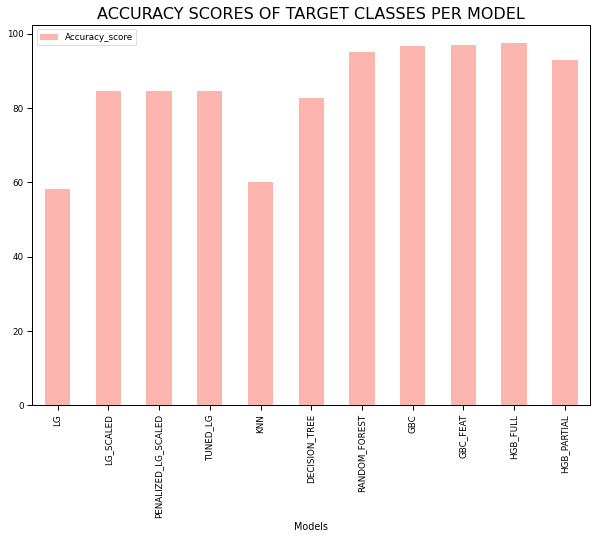

In [27]:
#Bargraph for Comparison of Accuracy for Each Model

accuracy_table.plot(x="Models", y= ['Accuracy_score'], kind = 'bar',figsize = (10,7), colormap = 'Pastel1')
plt.title('ACCURACY SCORES OF TARGET CLASSES PER MODEL', size = 16)
plt.show()

###**F1 SCORES**



In [28]:
f1_scores = pd.DataFrame(scores_table)
f1_table = f1_scores.round(decimals = 2)

#insert models names
f1_table.insert(0, 'Models', ['LG','LG_SCALED','PENALIZED_LG_SCALED','TUNED_LG','KNN','DECISION_TREE','RANDOM_FOREST','GBC','GBC_FEAT',
                              'HGB_FULL','HGB_PARTIAL'])
pd.DataFrame(f1_table)
f1_table

,Models,Level_1,Level_2,Level_3,Level_4
0,LG,65.72,49.73,65.23,37.92
1,LG_SCALED,90.16,83.64,83.84,81.62
2,PENALIZED_LG_SCALED,90.16,83.64,83.84,81.62
3,TUNED_LG,90.11,83.51,83.69,81.35
4,KNN,63.44,53.10,63.72,61.72
5,DECISION_TREE,90.05,74.48,83.49,85.23
6,RANDOM_FOREST,96.96,94.22,94.62,95.07
7,GBC,98.14,97.08,96.42,95.15
8,GBC_FEAT,98.25,97.06,96.68,95.80
9,HGB_FULL,98.84,97.84,97.09,96.07


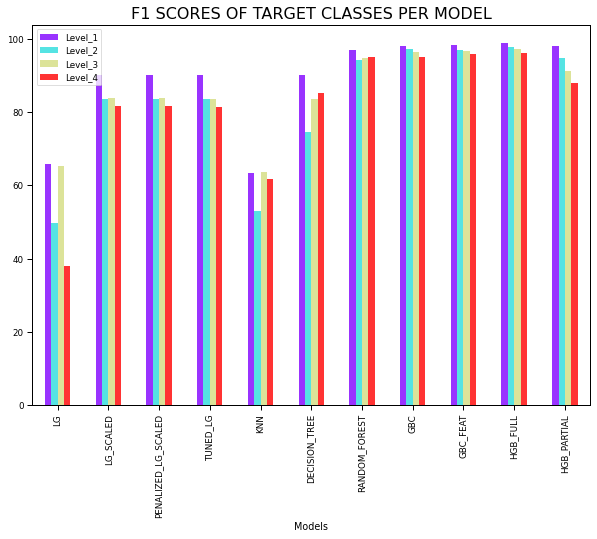

In [29]:
#Bargraph for Comparison of Metrics for Each Model

f1_table.plot(x='Models', y= ['Level_1','Level_2','Level_3','Level_4'], kind = 'bar',
               figsize = (10,7), colormap = 'rainbow', alpha = 0.8)
plt.title('F1 SCORES OF TARGET CLASSES PER MODEL', size = 16)
plt.show()

**Among all models, gradient boosted models outperform with more than 90% accuracy. HGB with partial features will be used for creating the web application for simpler end-to-end user application.**